In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

## import data

In [2]:
initial = pd.read_csv('../data/02_Initial_Data.txt', sep=",", names=['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class'])

initial.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
initial.columns.to_list()

['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

## General information on data

In [4]:
initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


data consists of total 699 records and 11 columns. Most of columns are numeric. Only "Bare Nuclei" column has object data type, so the column needs to be checked

In [5]:
print(initial["Bare Nuclei"].unique())
initial[initial["Bare Nuclei"] == "?"][["Bare Nuclei"]].count()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


Bare Nuclei    16
dtype: int64

Total 16 values of 699 in "Bare Nuclei" column are missing and represented by question mark. For EDA unknown records will be replaced by mode value of respective class. In modeling might be used different approach.

In [6]:
class_B_mode = pd.to_numeric(initial[(initial["Bare Nuclei"] != "?") & (initial["Class"] == 2)]["Bare Nuclei"]).mode()
class_M_mode = pd.to_numeric(initial[(initial["Bare Nuclei"] != "?") & (initial["Class"] == 4)]["Bare Nuclei"]).mode()
print(int(class_B_mode))
print(int(class_M_mode))

1
10


In [7]:
initial.loc[(initial["Bare Nuclei"] == "?") & (initial["Class"] == 2), "Bare Nuclei"] = int(class_B_mode)
initial.loc[(initial["Bare Nuclei"] == "?") & (initial["Class"] == 4), "Bare Nuclei"] = int(class_M_mode)
initial["Bare Nuclei"] = pd.to_numeric(initial["Bare Nuclei"])
initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [8]:
initial.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.512160,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.636146,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


"Sample code number" feature in this case make no sense, it will be dropped during variables selection. All other features, except "Class", which is also the target, have integer range form 1 to 10

### for further analysis "Class" feature will be converted to 1 and 0, 1 for 4 (malignant), 0 for 2 (benign)

In [9]:
initial.loc[initial["Class"] == 4, "Class"] = 1
initial.loc[initial["Class"] == 2, "Class"] = 0
initial["Class"].unique()

array([0, 1], dtype=int64)

### 65.5% of all records has beingn class

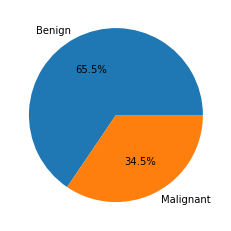

In [10]:
plt.pie(initial["Class"].value_counts(), autopct = "%1.1f%%", labels=["Benign", "Malignant"])
plt.show()

## "Clump Thickness" feature

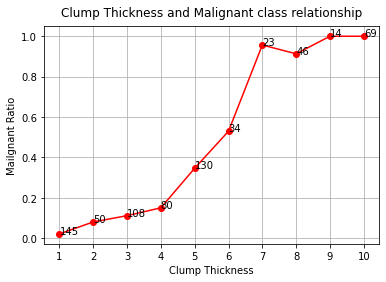

In [11]:
y1 = initial.loc[:, ["Clump Thickness", "Class"]].groupby("Clump Thickness").agg({"Clump Thickness":len, "Class":np.mean})
y1["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Clump Thickness and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y1.iloc[i, 0], xy=(range(11)[i + 1], y1.iloc[i, 1]))
plt.show()

<p style="color:blue">Numbers on the line show total quantity of records having respective x value</p>

This feature shows clear relation with the "Class" feature. Probability of malignant class increases with this feature value increase. In the dataset more than 90% of records with clump thickness above 6 value are malignant, and less than 15% of records, having clump thickness value below 15% are malignant

## Uniformity of Cell Size

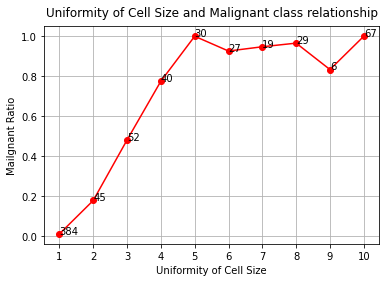

In [12]:
y2 = initial.loc[:, ["Uniformity of Cell Size", "Class"]].groupby("Uniformity of Cell Size").agg({"Uniformity of Cell Size":len, "Class":np.mean})

y2["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Uniformity of Cell Size and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y2.iloc[i, 0], xy=(range(11)[i + 1], y2.iloc[i, 1]))

plt.show()

Similar to previous feature, this one also shows relation with class. In this case Malignant ratio increses with increasing feature value as well.
In value of 5 Malignant ratio is above 80%, while in value it is only 1%.

## Uniformity of Cell Shape

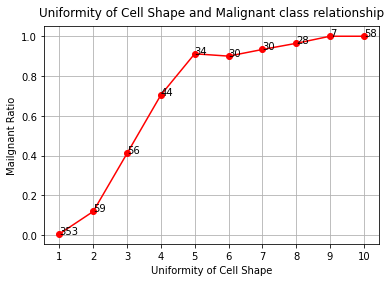

In [13]:
y3 = initial.loc[:, ["Uniformity of Cell Shape", "Class"]].groupby("Uniformity of Cell Shape").agg({"Uniformity of Cell Shape":len, "Class":np.mean})
y3["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Uniformity of Cell Shape and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y3.iloc[i, 0], xy=(range(11)[i + 1], y3.iloc[i, 1]))
plt.show()

Uniformity of Cell Shape has lots of similarities with previous feature. It has nearly identical distribution as previous and shows almost the same relationship with Malignant ratio. It might be highly correlated with "cell size" feature, which means, one of them should not be ysed in final model.

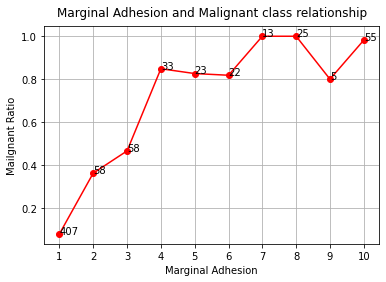

In [14]:
y4 = initial.loc[:, ["Marginal Adhesion", "Class"]].groupby("Marginal Adhesion").agg({"Marginal Adhesion":len, "Class":np.mean})
y4["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Marginal Adhesion and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y4.iloc[i, 0], xy=(range(11)[i + 1], y4.iloc[i, 1]))
plt.show()

Marginal Adhesion feature has similar behavior has too. Most of its values are distributed in [1-3] interval, and have lower Malignant Ratio. With increasing the feature value, ratio increases as well.

## Single Epithelial Cell Size

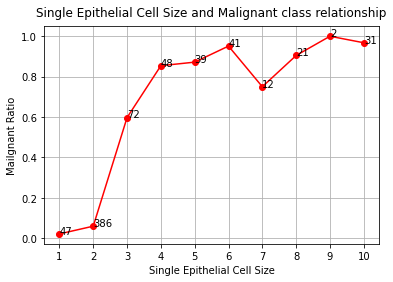

In [15]:
y5 = initial.loc[:, ["Single Epithelial Cell Size", "Class"]].groupby("Single Epithelial Cell Size").agg({"Single Epithelial Cell Size":len, "Class":np.mean})
y5["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Single Epithelial Cell Size and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y5.iloc[i, 0], xy=(range(11)[i + 1], y5.iloc[i, 1]))
plt.show()

This feature is similar to previous.

## Bare Nuclei

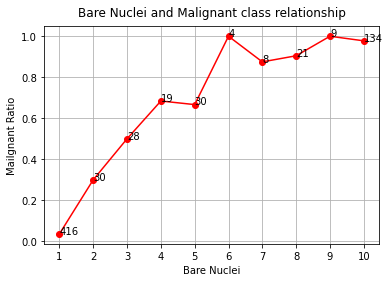

In [16]:
y6 = initial.loc[:, ["Bare Nuclei", "Class"]].groupby("Bare Nuclei").agg({"Bare Nuclei":len, "Class":np.mean})
y6["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Bare Nuclei and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y6.iloc[i, 0], xy=(range(11)[i + 1], y6.iloc[i, 1]))
plt.show()

This feature is similar to previous.

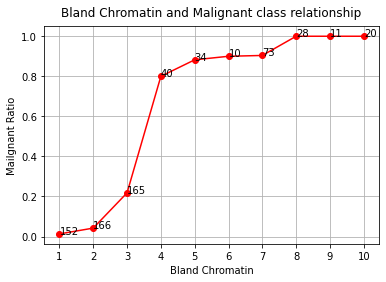

In [17]:
y7 = initial.loc[:, ["Bland Chromatin", "Class"]].groupby("Bland Chromatin").agg({"Bland Chromatin":len, "Class":np.mean})
y7["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Bland Chromatin and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y7.iloc[i, 0], xy=(range(11)[i + 1], y7.iloc[i, 1]))
plt.show()

This feature is similar to previous.

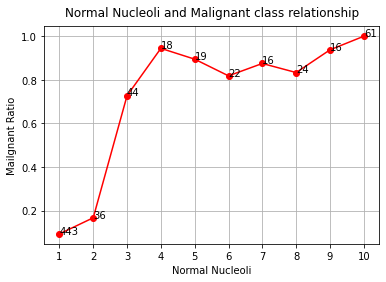

In [18]:
y8 = initial.loc[:, ["Normal Nucleoli", "Class"]].groupby("Normal Nucleoli").agg({"Normal Nucleoli":len, "Class":np.mean})
y8["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Normal Nucleoli and Malignant class relationship", pad=10)
for i in range(10):
    plt.annotate(y8.iloc[i, 0], xy=(range(11)[i + 1], y8.iloc[i, 1]))
plt.show()

Although some values in this feature were missing and had been replaced by mode, this feature also shows same behavior as precedent ones

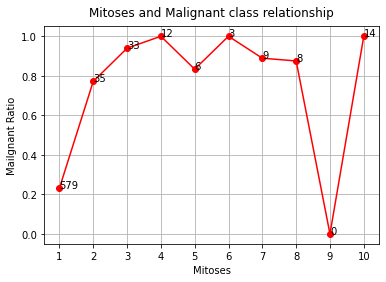

In [19]:
y9 = initial.loc[:, ["Mitoses", "Class"]].groupby("Mitoses").agg({"Mitoses":len, "Class":np.mean})
y9.loc[9] = 0
y9.sort_index(inplace=True)

y9["Class"].plot(kind="line", xticks = range(1, 11), grid=True, color="r", marker="o")
plt.ylabel("Mailgnant Ratio")
plt.title("Mitoses and Malignant class relationship", pad=10)

for i in range(10):
    plt.annotate(y9.iloc[i, 0], xy=(range(11)[i + 1], y9.iloc[i, 1]))
plt.show()

Mitoses also have same behavior regarding to relation with class feature. With its value growth increases the percentage of malignant class. There is a drop in 9 value on the chart below, which is due to not existing record with 9 value of mitoses.

### Density distribution of features by class.

C:\Users\AM000925\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


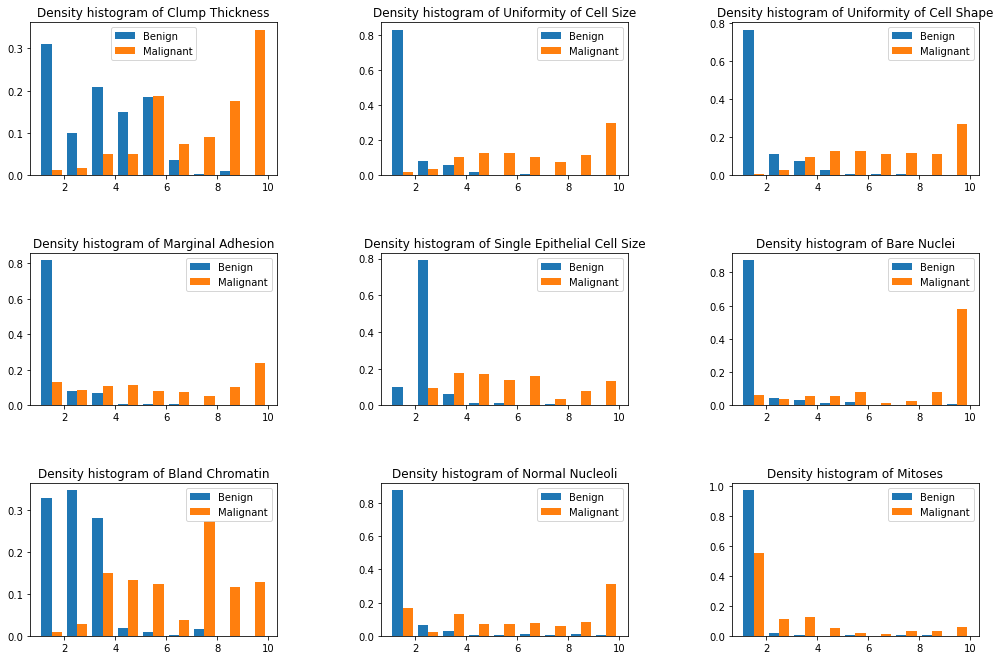

In [20]:
fig, axs = plt.subplots(3, 3)
fig.tight_layout(h_pad = 1)
fig.set_figheight(10)
fig.set_figwidth(15)
for r in range(3):
    for c in range(3):
        B = initial.loc[initial["Class"] == 0].iloc[:, r * 3 + c + 1]
        M = initial.loc[initial["Class"] == 1].iloc[:, r * 3 + c + 1]
        axs[r, c].hist([B, M], density=True, bins = range(1, 11)) #cumulative=True
        axs[r, c].set_title("Density histogram of " + initial.columns[r * 3 + c + 1])
        axs[r, c].legend(["Benign", "Malignant"])
plt.show()

Most of malignant class feature values are distributed near higher values, meanwhile beingn class values of all features tend to be smaller. The only exception is "Mitoses" feature. Its values are distribured mainly near to smaller values for both classes.

This is also visible when looking at percentile values of each class

In [21]:
initial[initial["Class"] == 1].describe().iloc[4:7, 1:-1]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
25%,5.0,4.0,4.0,3.0,3.0,5.0,4.0,3.0,1.0
50%,8.0,6.0,6.0,5.0,5.0,10.0,7.0,6.0,1.0
75%,10.0,10.0,9.0,8.0,6.0,10.0,7.0,10.0,3.0


In [22]:
initial[initial["Class"] == 0].describe().iloc[4:7, 1:-1]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
25%,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
50%,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
75%,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0


In first table (Malignant Class) 25 percentiles of features (except mitoses) are higher of second table (Beign Class) 75% percentiles

### Correlation beetwen features

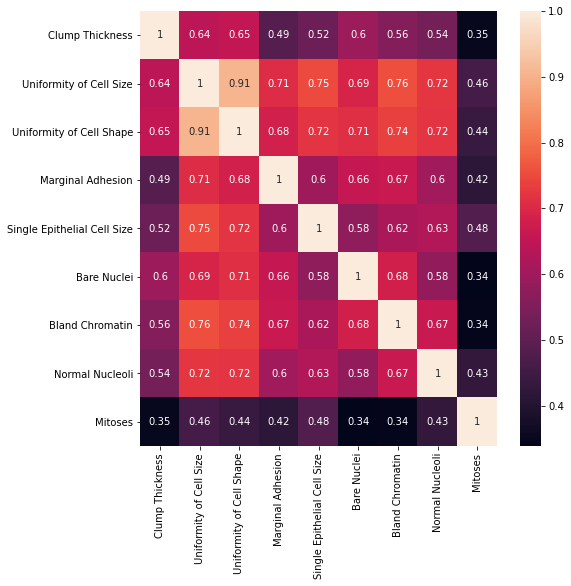

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(initial.iloc[:, 1:-1].corr(), annot=True)
plt.show()

Correlation table shows that ther is some correlation in almost all features, however, "Uniformity of Cell Size" and "Uniformity of Cell Shape" features are highly correlated. "Uniformity of Cell Size" has also higher correalation with other features vs "Uniformity of Cell Shape". Hence it should not be used during the modeling.
Most of features have some positive correlation with target variable.

## To summarize EDA we can mention next points

<ul>
    <li>All variables, except mitoses have higher values for Malignant Class, and lower values for Benign Class</li>
    <li>Mitoses show similar behavior for both classes</li>
    <li>There is a correlation beetwen most features, uniformity of cell size and cell shape are highly correlated</li>
</ul>

# Modeling (draft)

Separate the target variable from the dataset, and drop first column, which is not onformative

In [24]:
# X = Matrix of Features
# Y = Response Feature

X = initial.iloc [:, 1 :-1].values
y = initial.iloc [:, -1].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First example:", X[0])
print("First label:", y[0])

Shape of X: (699, 9)
Shape of y: (699,)
First example: [5 1 1 1 2 1 3 1 1]
First label: 0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [26]:
print("Shape of X_train:  "  , X_train.shape)
print("Shape of y_train:  "  , y_train.shape)
print("Shape of X_test:   "  , X_test.shape)
print("Shape of y_test    "  , y_test.shape)

Shape of X_train:   (559, 9)
Shape of y_train:   (559,)
Shape of X_test:    (140, 9)
Shape of y_test     (140,)


### LOGISTIC REGRESSION MODEL

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)
y_pred_log = classifier_log.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)

acc_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:" , acc_log)
print("=======Confusion Matrix=======")
print(cm_log)

Accuracy: 0.9785714285714285
=======Confusion Matrix=======
[[91  1]
 [ 2 46]]


### K-NN MODEL

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict (X_test)
cm_knn = confusion_matrix (y_test, y_pred_knn)
acc_knn = accuracy_score (y_test, y_pred_knn)
print("Accuracy:", acc_knn)
print("=======Confusion Matrix=======")
print(cm_knn)

Accuracy: 0.9785714285714285
=======Confusion Matrix=======
[[91  1]
 [ 2 46]]


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit(X_train, y_train)
y_pred_dtc = classifier_dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", acc_dtc)
print("=======Confusion Matrix=======")
print(cm_dtc)

Accuracy: 0.9285714285714286
=======Confusion Matrix=======
[[90  2]
 [ 8 40]]


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier_rfc.fit(X_train, y_train)
y_pred_rfc = classifier_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", acc_rfc)
print("=======Confusion Matrix=======")
print(cm_rfc)

Accuracy: 0.9714285714285714
=======Confusion Matrix=======
[[91  1]
 [ 3 45]]


In [31]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_log, acc_knn, acc_dtc, acc_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,LOGISTIC REGRESSION,0.978571
1,K-NN,0.978571
2,DECISION TREE,0.928571
3,RANDOM FOREST,0.971429


## Draft modeling shows that all models have good accuracy (>0.9). Best models are Logistic regression and KNN with same accuracy (0.98).
Next step is cross validation